In [1]:
import pandas as pd

data = {
    "customer_id": ["001","002","003","004","005","006","007","008","009","010"],
    "tenure_months": [12,3,20,5,8,15,2,10,18,6],
    "monthly_usage": [8.4,2.1,15.2,3.8,7.9,12.5,1.8,9.1,14.0,4.2],
    "complaints": [0,1,0,2,1,0,1,0,0,2],
    "payment_late": [0,1,0,1,0,1,1,0,0,1],
    "plan_type": ["Basic","Basic","Premium","Standard","Basic","Premium","Basic","Standard","Premium","Standard"],
    "churn": ["No","Yes","No","Yes","No","No","Yes","No","No","Yes"]
}

df = pd.DataFrame(data)
file_path = "/content/customer_churn_light.csv"
df.to_csv(file_path, index=False)

file_path

'/content/customer_churn_light.csv'

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('customer_churn_light.csv')

X = df.drop('churn', axis=1)
y = df['churn']

categorical_cols = ['plan_type']
numeric_cols = ['tenure_months', 'monthly_usage', 'complaints', 'payment_late']

preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

model = RandomForestClassifier(n_estimators=200, random_state=42)

pipeline = Pipeline([
    ('prep', preprocess),
    ('rf', model)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)

# Hitung accuracy score
accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy)
print(X_test)
print(preds)
print(y_test)

Accuracy: 1.0
   customer_id  tenure_months  monthly_usage  complaints  payment_late  \
5            6             15           12.5           0             1   
1            2              3            2.1           1             1   

  plan_type  
5   Premium  
1     Basic  
['No' 'Yes']
5     No
1    Yes
Name: churn, dtype: object


In [3]:
from sklearn.metrics import confusion_matrix, classification_report

df = pd.read_csv('customer_churn_light.csv')

X = df.drop('churn', axis=1)
y = df['churn']

categorical_cols = ['plan_type']
numeric_cols = ['tenure_months', 'monthly_usage', 'complaints', 'payment_late']

preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

model = RandomForestClassifier(n_estimators=200, random_state=42)

pipeline = Pipeline([
    ('prep', preprocess),
    ('rf', model)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, preds)
print("Accuracy:", accuracy)

# Confusion Matrix
cm = confusion_matrix(y_test, preds)
print("Confusion Matrix:\n", cm)

# Classification Report
cr = classification_report(y_test, preds)
print("Classification Report:\n", cr)

Accuracy: 1.0
Confusion Matrix:
 [[1 0]
 [0 1]]
Classification Report:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



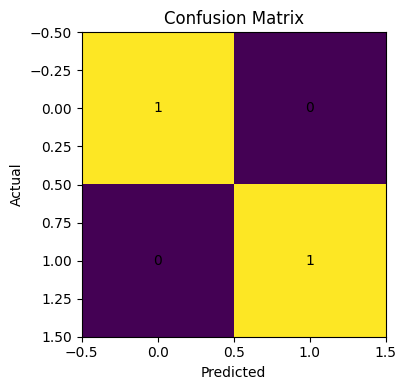

In [4]:
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('/content/customer_churn_light.csv')

X = df.drop('churn', axis=1)
y = df['churn']

categorical_cols = ['plan_type']
numeric_cols = ['tenure_months', 'monthly_usage', 'complaints', 'payment_late']

preprocess = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
], remainder='passthrough')

model = RandomForestClassifier(n_estimators=200, random_state=42)

pipeline = Pipeline([
    ('prep', preprocess),
    ('rf', model)
])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipeline.fit(X_train, y_train)
preds = pipeline.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, preds)

# Visualization
plt.figure(figsize=(5, 4))
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Add value labels inside the matrix
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.tight_layout()
plt.show()